Casper  Business Intelligence Analyst

Author: Wanda Wang


In [244]:
#import libraries, load in the data
import os
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from __future__ import division
import sys 
sys.path.insert(0, "/anaconda/lib/python2.7/site-packages")
import seaborn as sns
import datetime as dt
import dateutil.parser
os.chdir('/Users/wandawang/Desktop')
xls = pd.read_excel('XLS takehome.xlsx', header = 0)

In [245]:
#Verify data was loaded
xls #213 rows

,dateordered,datereturned,orderstatus,orders
0,12-31-2014,1-24-2015,returned,1
1,12-31-2014,NaN,complete,8
2,12-30-2014,NaN,complete,14
3,12-29-2014,NaN,complete,14
4,12-28-2014,12-29-2014,returned,1
5,12-28-2014,NaN,complete,23
6,12-27-2014,1-28-2015,returned,1
7,12-27-2014,1-25-2015,returned,1
8,12-27-2014,1-15-2015,returned,1
9,12-27-2014,1-5-2015,returned,1


In [246]:
xls['orders'].sum() #1093 total orders

1093

In [247]:
#data types
print xls.dtypes

dateordered     object
datereturned    object
orderstatus     object
orders           int64
dtype: object


In [248]:
#How many cells have missing info?
print xls.isnull().sum()  
#There are 153 missing values in datereturned column

dateordered       0
datereturned    153
orderstatus       0
orders            0
dtype: int64


Tasks

1) Convert dateordered, datereturned to datetime format

2) Add new column for days difference between dateordered, datereturned

3) Add new column for Month,Year for dateordered (readability purposes)

4) Return Rate: Subset data for returns only.

*Make sure to calculate a return rate % where both the numerator and denominator will be apples to apples e.g. monthly returns for products purchased in December / total products purchased in December ; e.g. Some products purchased in December but returned in Janurary, should still be included in the December return rate calculation.

In [249]:
#Convert dateordered, datereturned to datetime
xls['dateordered'] = pd.to_datetime(xls['dateordered'])
xls['datereturned'] = pd.to_datetime(xls['datereturned'])

#Add new column for days difference between dateordered, datereturned 
xls['returnDays'] = xls['datereturned'] - xls['dateordered']

#Add new column for Month/Year for dateordered
xls['dateordered_Mon_Yr'] = xls.dateordered.apply(lambda x: dt.datetime.strftime(x, '%b %Y'))

#Subset data for rows with orderstatus = returned only 
returnSubset = xls[xls['orderstatus'] == 'returned']
returnSubset
#returnSubset.shape 

#There are 60 instances of returns across all months

,dateordered,datereturned,orderstatus,orders,returnDays,dateordered_Mon_Yr
0,2014-12-31,2015-01-24,returned,1,24 days,Dec 2014
4,2014-12-28,2014-12-29,returned,1,1 days,Dec 2014
6,2014-12-27,2015-01-28,returned,1,32 days,Dec 2014
7,2014-12-27,2015-01-25,returned,1,29 days,Dec 2014
8,2014-12-27,2015-01-15,returned,1,19 days,Dec 2014
9,2014-12-27,2015-01-05,returned,1,9 days,Dec 2014
13,2014-12-24,2015-01-20,returned,1,27 days,Dec 2014
14,2014-12-24,2014-12-30,returned,1,6 days,Dec 2014
15,2014-12-24,2014-12-29,returned,1,5 days,Dec 2014
18,2014-12-23,2015-01-01,returned,1,9 days,Dec 2014


A customer on average takes 40 days between date ordered and date returned to return an item

In [250]:
returnSubset['returnDays'].mean() 

Timedelta('40 days 20:00:00')

Aggregate returns by Month

In [251]:
#Find Total Orders per Month
Orders_by_Month = xls.set_index('dateordered')['orders'].resample('MS').sum() 
#Find Total Returns per Month
returns_by_Mon = returnSubset.set_index('dateordered')['orders'].resample('MS').sum() 

In [252]:
Orders_by_Month = pd.DataFrame(Orders_by_Month.reset_index())
Orders_by_Month['Month_Yr'] = \
    Orders_by_Month.dateordered.apply(lambda x: dt.datetime.strftime(x, '%b %Y'))
returns_by_Mon = pd.DataFrame(returns_by_Mon.reset_index())
returns_by_Mon['Month_Yr'] = \
    returns_by_Mon.dateordered.apply(lambda x: dt.datetime.strftime(x, '%b %Y'))

In [253]:
#Visualize Orders by Month, and Returns by Month

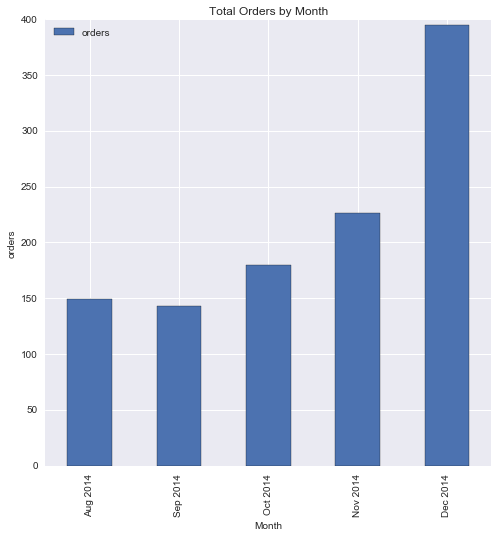

In [254]:
plt.rcParams['figure.figsize'] = 8,8
Orders_by_Month.reset_index().plot(x='Month_Yr', y='orders',kind="bar")
plt.xlabel('Month', fontsize = 10)
plt.ylabel('orders', fontsize = 10)
plt.title('Total Orders by Month')

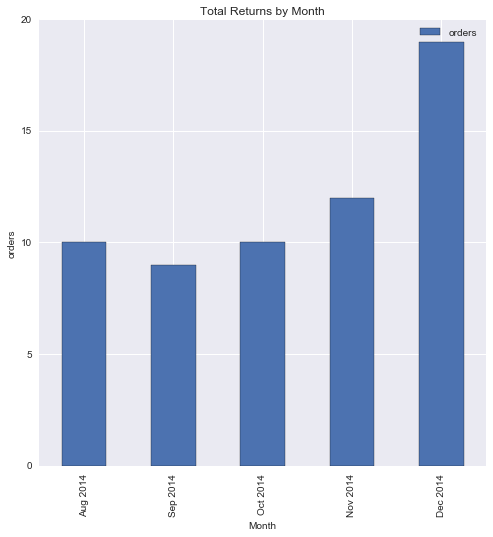

In [255]:
plt.rcParams['figure.figsize'] =  8,8
returns_by_Mon.reset_index().plot(x='Month_Yr', y='orders',kind="bar")
plt.xlabel('Month', fontsize = 10)
plt.ylabel('orders', fontsize = 10)
plt.title('Total Returns by Month')

In [256]:
#Find Total Orders per Month
Orders_by_Month = xls.set_index('dateordered')['orders'].resample('MS').sum() 
#Find Total Returns per Month
returns_by_Mon = returnSubset.set_index('dateordered')['orders'].resample('MS').sum() 
#Return Rate by Month
return_rate = returns_by_Mon/Orders_by_Month *100
#return_rate
return_rate = pd.DataFrame(return_rate.reset_index().rename(columns={'orders':'return_rate'}))

In [257]:
#Add new column for Month, Year
return_rate['Month_Yr'] = return_rate.dateordered.apply(lambda x: dt.datetime.strftime(x, '%b %Y'))
return_rate.drop(['dateordered'], axis=1, inplace=True)

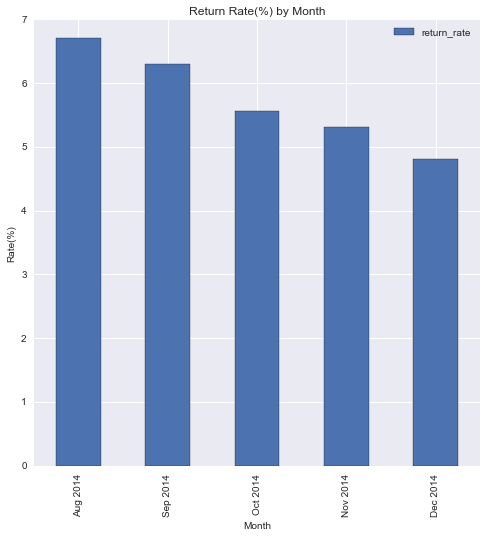

In [258]:
plt.rcParams['figure.figsize'] =  8,8
return_rate.reset_index().plot(x='Month_Yr', y='return_rate',kind="bar")
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Rate(%)', fontsize = 10)
plt.title('Return Rate(%) by Month')

Please note that given the limited amount of data, earlier months will have a higher return rate 
due to more time the customer has to complete the return after purchase. 

Just because the Dec 2014 return rate is lower than Aug does not mean
customers won't return an item purchased in Dec in later months. 

See below chart on the average number of days for returns by month, which shows that customers took around 70 days on average for returns of goods purchased in August. In fact one of the purchases made in August was returned after 122 days!

Thus it would not be best practice to conclude a trend for Sept through December. 

In [261]:
returnSubset['returnDays'] = returnSubset['returnDays'].astype('timedelta64[D]').astype(int)
Mean_returnDays = returnSubset.set_index('dateordered')['returnDays'].resample('MS').mean()
Mean_returnDays = Mean_returnDays.reset_index()
Mean_returnDays['Month_Yr'] = \
    Mean_returnDays.dateordered.apply(lambda x: dt.datetime.strftime(x, '%b %Y'))
Mean_returnDays

  dateordered  returnDays  Month_Yr
0  2014-08-01   72.700000  Aug 2014
1  2014-09-01   59.444444  Sep 2014
2  2014-10-01   47.600000  Oct 2014
3  2014-11-01   31.083333  Nov 2014
4  2014-12-01   17.842105  Dec 2014


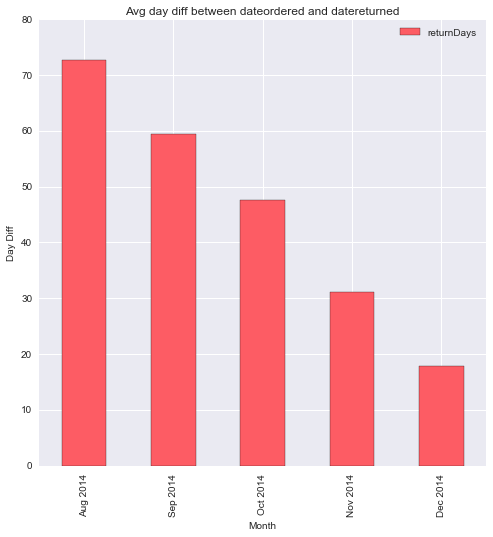

In [260]:
#returnSubset['returnDays'] = returnSubset['returnDays'].astype('timedelta64[D]').astype(int)
#Mean_returnDays = returnSubset.set_index('dateordered')['returnDays'].resample('MS').mean()
print Mean_returnDays

#average returnDays by month based on dateordered date
plt.rcParams['figure.figsize'] = 8,8
Mean_returnDays.plot(x='Month_Yr', y='returnDays',kind="bar",color='#FD5C64')
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Day Diff', fontsize = 10);
plt.title('Avg day diff between dateordered and datereturned')

#Trending downwards